# Understanding the variations in US car conditions 
## We are going to visualize all possible conditions for the dataset given

what are we finding ?
1. Which car and what model has the title for most clean vehicle and most  preferred by people? 
2. Which state holds the highest count of salvage insurance?
3. Which state has the highest title of clean car?
4. What is the price variations w.r.t the mileage of the car?
5. What has been the trend of car selection of people in the past years?


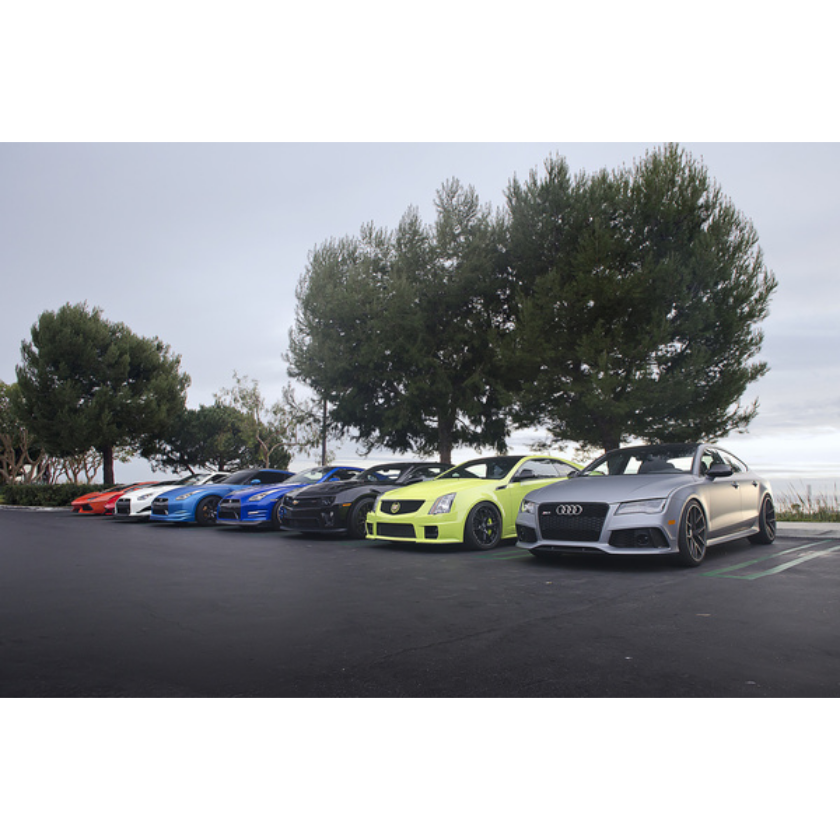

In [1]:
library(EBImage)
img = readImage("https://images.all-free-download.com/images/graphiclarge/cars_514839.jpg")
display(img, method = "raster")

Getting the required library 

In [2]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(stringr)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()   masks EBImage::combine()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::transpose() masks EBImage::transpose()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
Data <- read.csv("../input/usa-cers-dataset/USA_cars_datasets.csv")

In [4]:
head(Data)

,X,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
2,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
3,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
4,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
5,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
6,5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left


## Q1. Which car and what model has the title for most clean vehicle and most  preferred by people?
### Ans: The most preffered car is of ford, model is door and the model holding the most count of clean vehical is door.

Rank of the top 2 brand's:
1. Ford
2. dodge

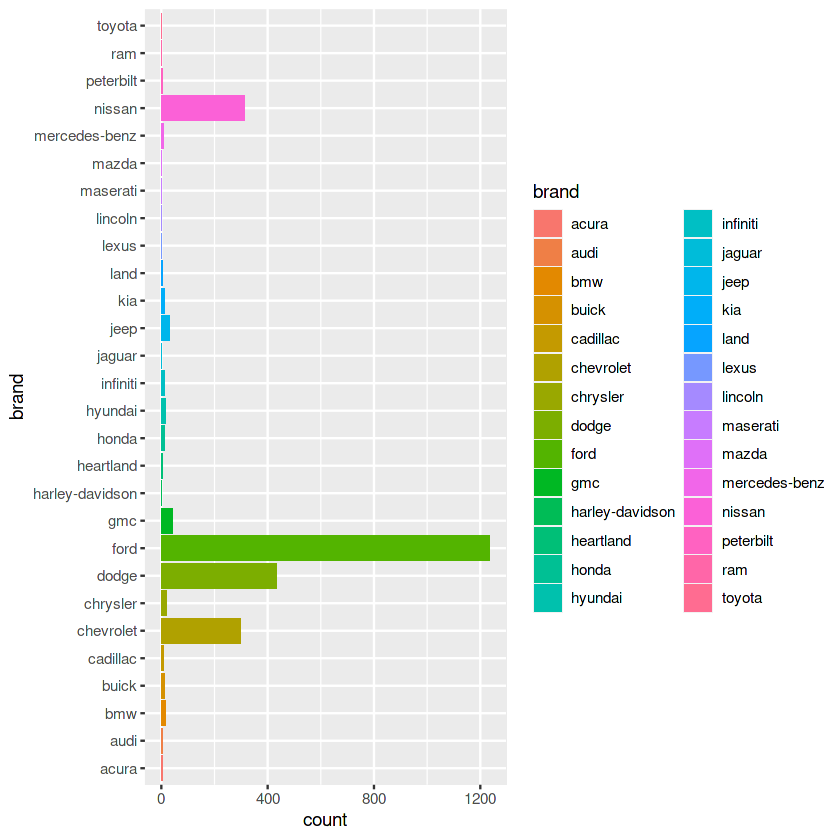

In [5]:
Data%>%
group_by(brand)%>%
ggplot(aes(y=brand, fill = brand)) + geom_bar(stat="count")

 From the visual we can say Ford is ranked number 1 following it is dodge 

Creating a table for storing clean vehicle and vehicals which have their insurance salvaged

In [6]:
clean_data <- Data%>%
group_by(brand)%>%
filter(str_detect(title_status, 'clean vehicle'))%>%
select(brand, model,year, title_status, state, price, mileage)

savage_data <- Data%>%
group_by(title_status)%>%
filter(str_detect(title_status, 'salvage insurance'))%>%
select(brand, model, title_status, state, price)




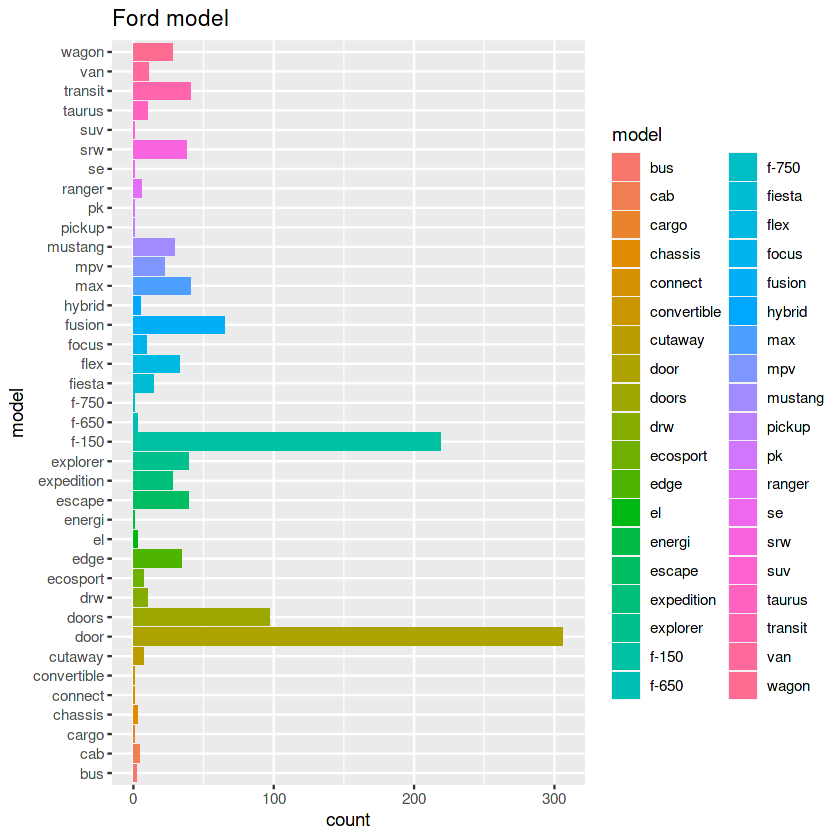

In [7]:
Ford_clean_data<-clean_data%>%
group_by(model)%>%
filter(str_detect(brand, 'ford'))%>%
select(brand, model,year, state, price)

Ford_clean_data%>%
group_by(model)%>%
ggplot(aes(y=model, fill = model)) + geom_bar(stat="count")+labs(title = "Ford model")

The most model of vehicle purchased by the people is from the brand Ford and model is door

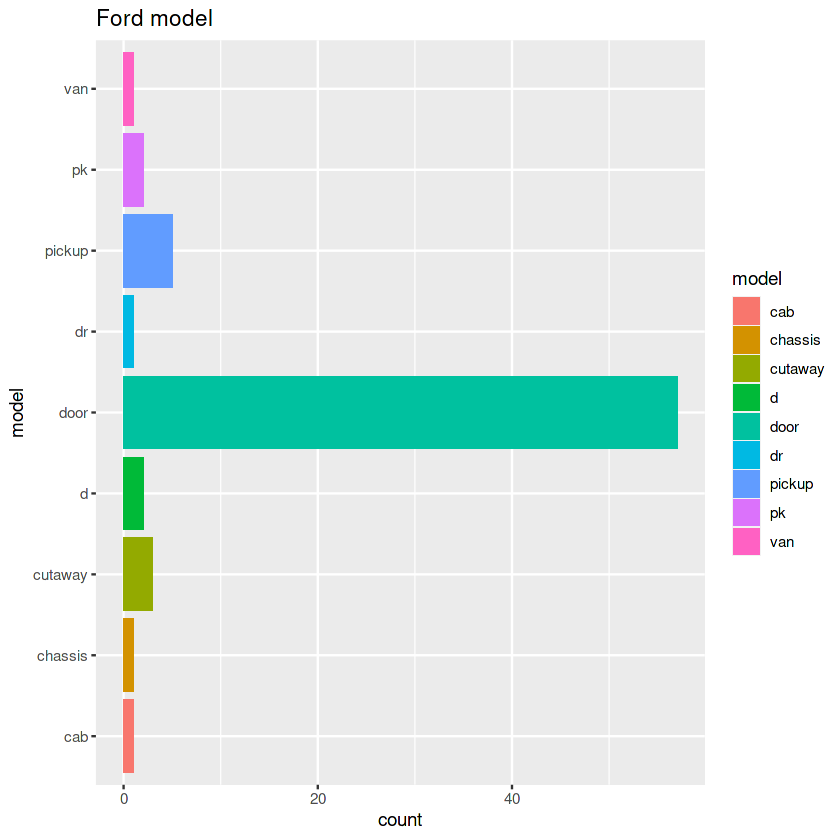

In [8]:
Ford_savage_data<-savage_data%>%
group_by(model)%>%
filter(str_detect(brand, 'ford'))%>%
select(brand, model, state, price)

Ford_savage_data%>%
group_by(model)%>%
ggplot(aes(y=model, fill = model)) + geom_bar(stat="count")+ labs(title = "Ford model")

And the model door is the same one which has the most salvage insurance

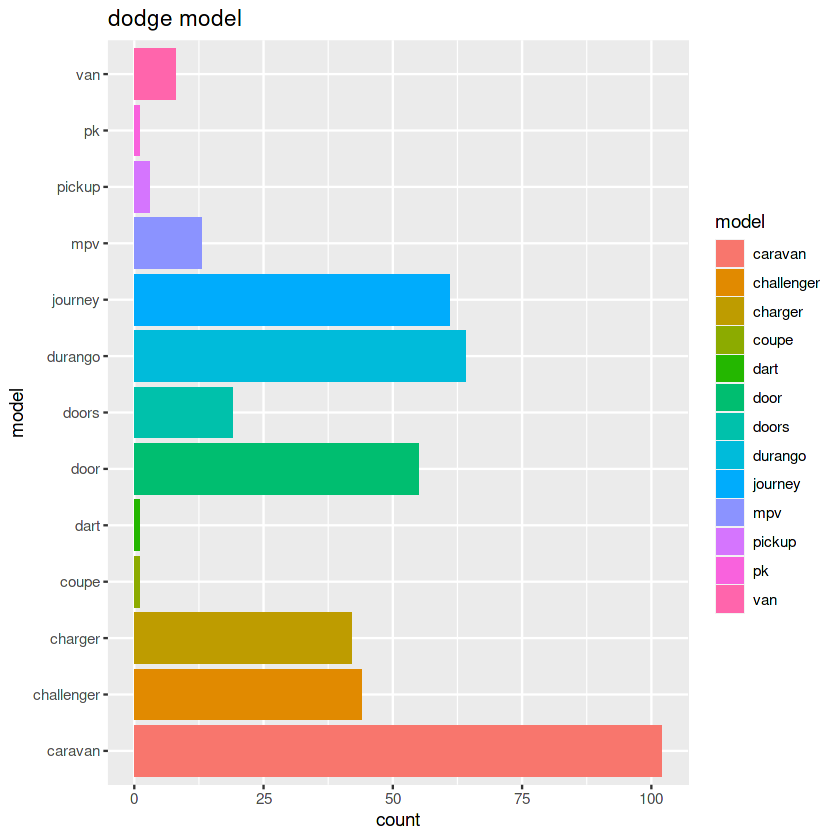

In [9]:
dodge_clean_data<-clean_data%>%
group_by(model)%>%
filter(str_detect(brand, 'dodge'))%>%
select(brand, model, state, price)

ggplot(data =dodge_clean_data,mapping =  aes(y=model, fill = model)) + geom_bar(stat="count")+labs(title = "dodge model" )



The highest purchase of dodge which is still a clean vehical is caravan

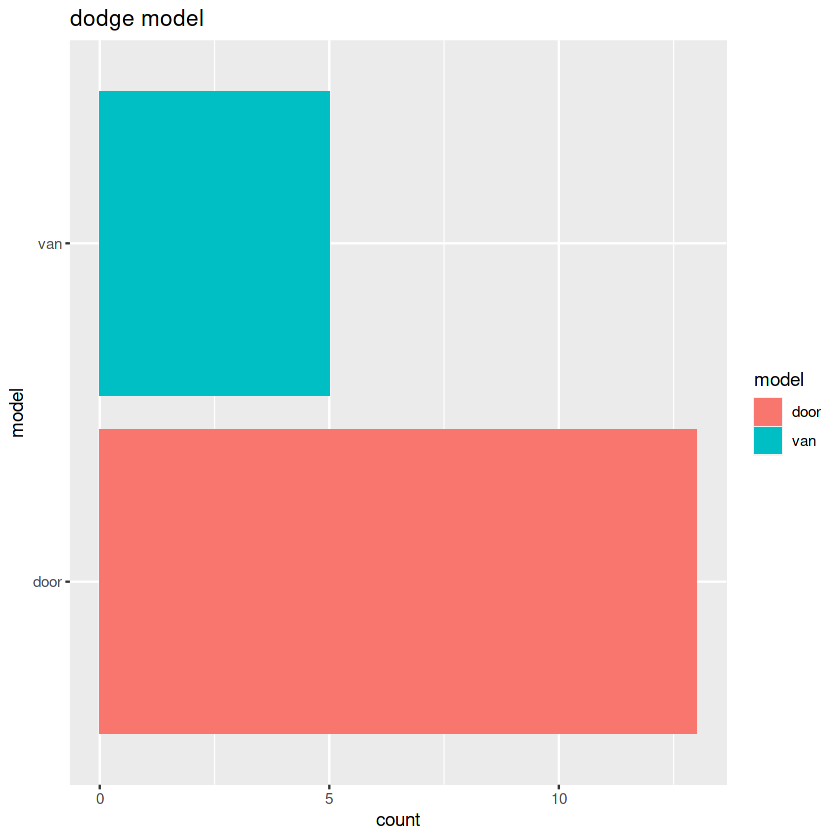

In [10]:
dodge_savage_data<-savage_data%>%
group_by(model)%>%
filter(str_detect(brand, 'dodge'))%>%
select(brand, model, state, price)

ggplot(data =dodge_savage_data,mapping =  aes(y=model, fill = model)) + geom_bar(stat="count")+labs(title = "dodge model" )



The most salvage insurance is from the model door

## US and Canada comparing them
### we find that from Canada there are only 2 cars available dodge and chevrolet

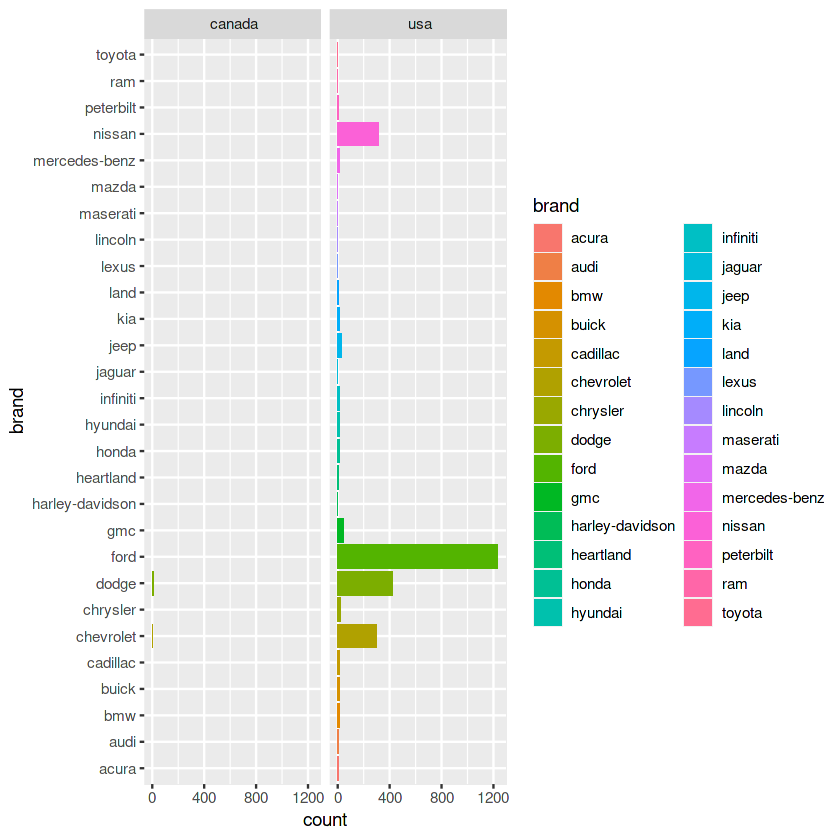

In [11]:
Data%>%
group_by(country )%>%
ggplot(aes(y=brand, fill = brand)) + geom_bar(stat="count")+facet_wrap(~country)

## Q2. Which state holds the highest count of salvage insurance?
### Ans: Texas has the highest amount of claims on salvage insurance and following it is Oklahoma

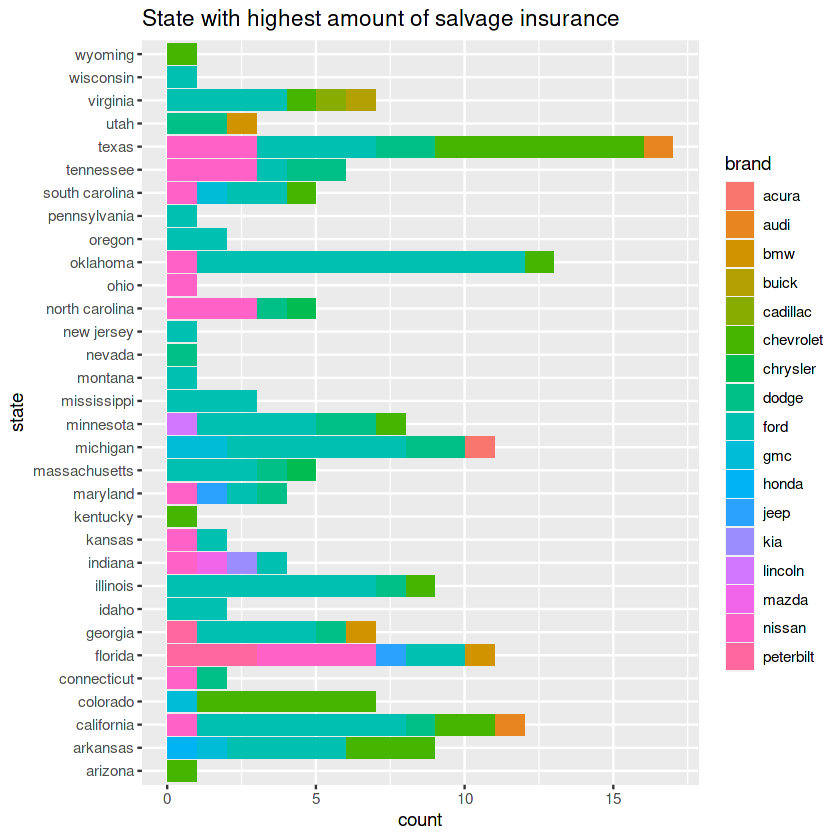

In [12]:

savage_data%>%
ggplot(mapping =  aes(y=state, fill = brand)) + geom_bar(stat="count")+labs(title = "State with highest amount of salvage insurance" )


This graph tells us texas has the highest amount of claims on salvage insurance and following it is Oklahoma. We also find in texas most salvage insurance is from the brand chevrolet and in Oklahoma it is ford 

## Q3. Which state has the highest and the lowest for the title of clean car?
### Ans: The state with most clean vehicle is pennsylvania and brand is with highest contributed for it is ford.

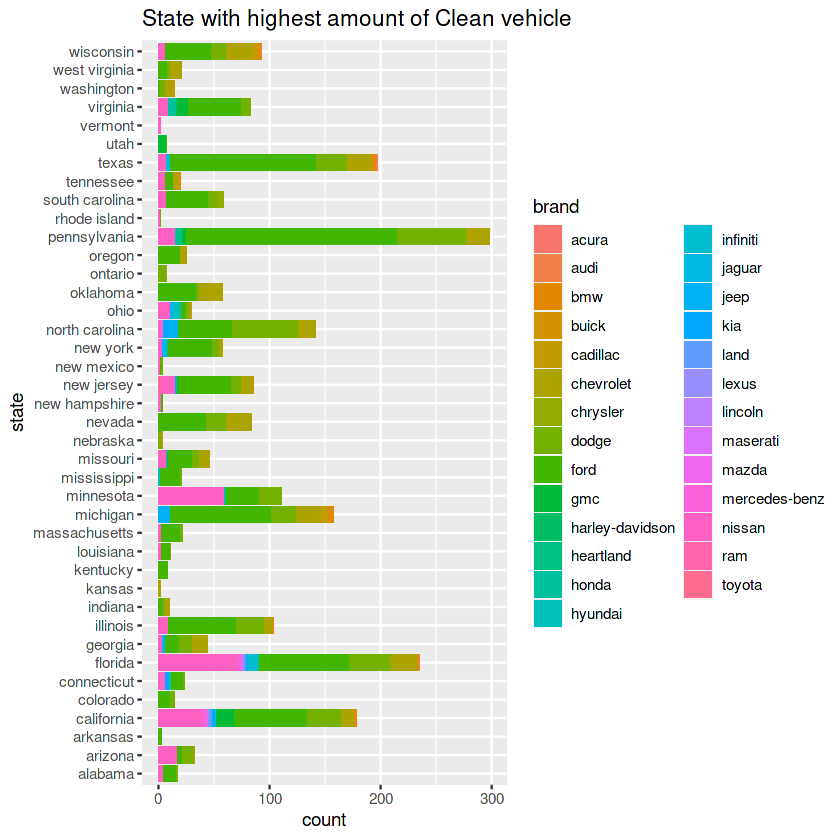

In [13]:
clean_data%>%
ggplot(mapping =  aes(y=state, fill = brand)) + geom_bar(stat="count")+labs(title = "State with highest amount of Clean vehicle " )

## Q4. What is the price variations w.r.t the mileage of the car?

We will be finding for only the clean vehical 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



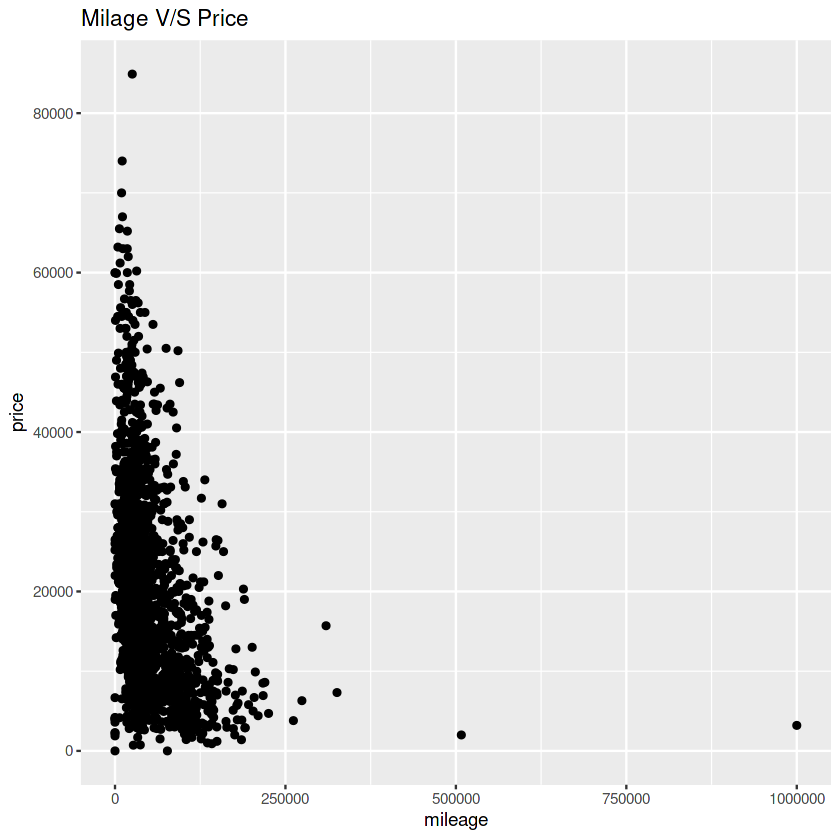

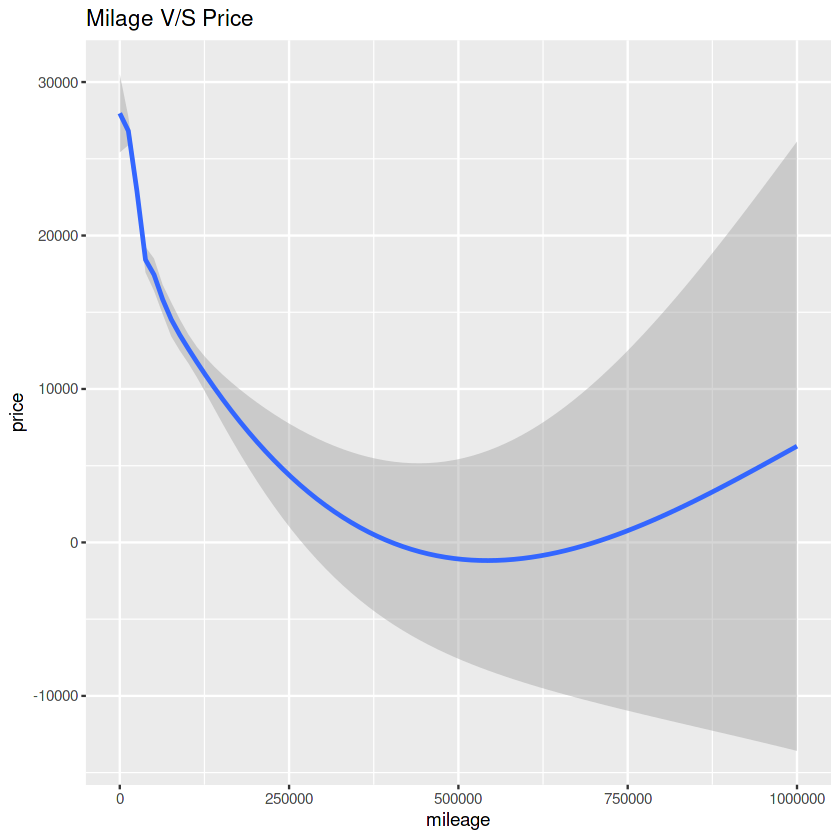

In [14]:
clean_data%>%
ggplot()+ geom_point(mapping =  aes(x = mileage, y = price))+labs(title = "Milage V/S Price" )

clean_data%>%
ggplot()+ geom_smooth(mapping =  aes(x = mileage, y = price))+labs(title = "Milage V/S Price" )

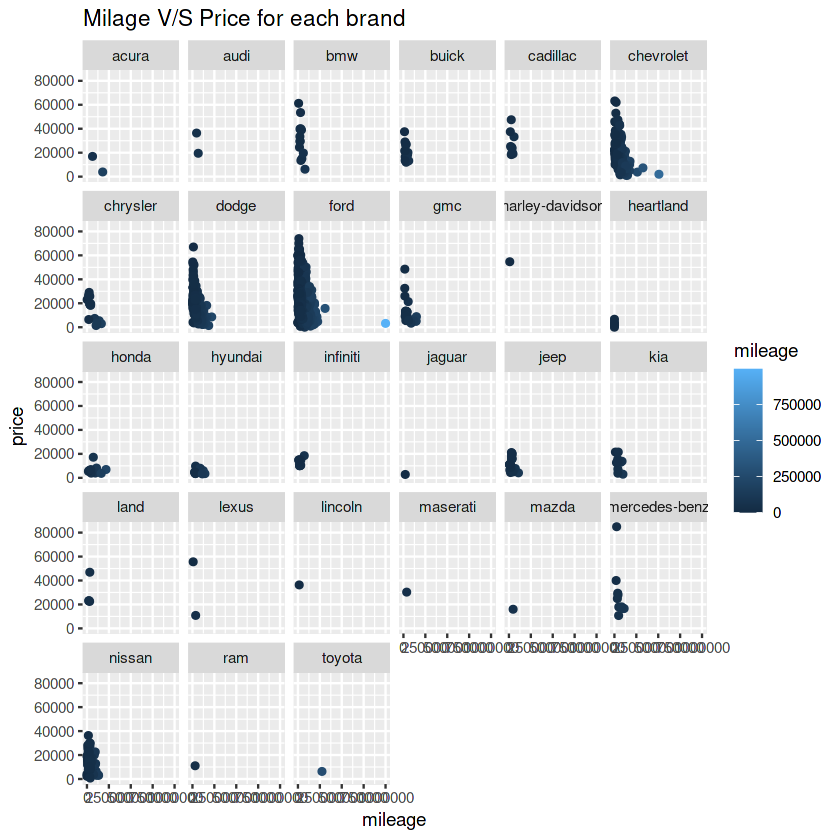

In [15]:
clean_data%>%
ggplot()+ geom_point(mapping =  aes(x = mileage, y = price, color = mileage))+labs(title = "Milage V/S Price for each brand" )+facet_wrap(~brand)

## Q5. What has been the trend of car selection of people in the past years?
### Ans: The customer have made the purchase of vehical the most in the year 2019-20 and we have observed that Ford (f-150) has one of the highest contribution to it.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



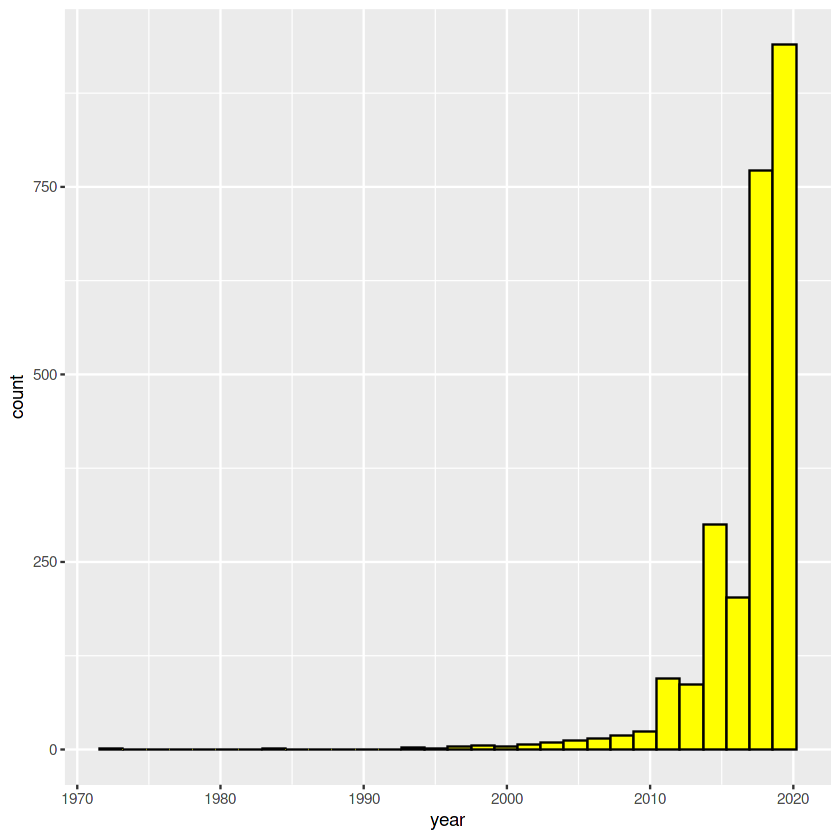

In [16]:
Data%>%
group_by(brand)%>%
ggplot(aes(x = year)) + geom_histogram(fill="yellow",colour="black")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



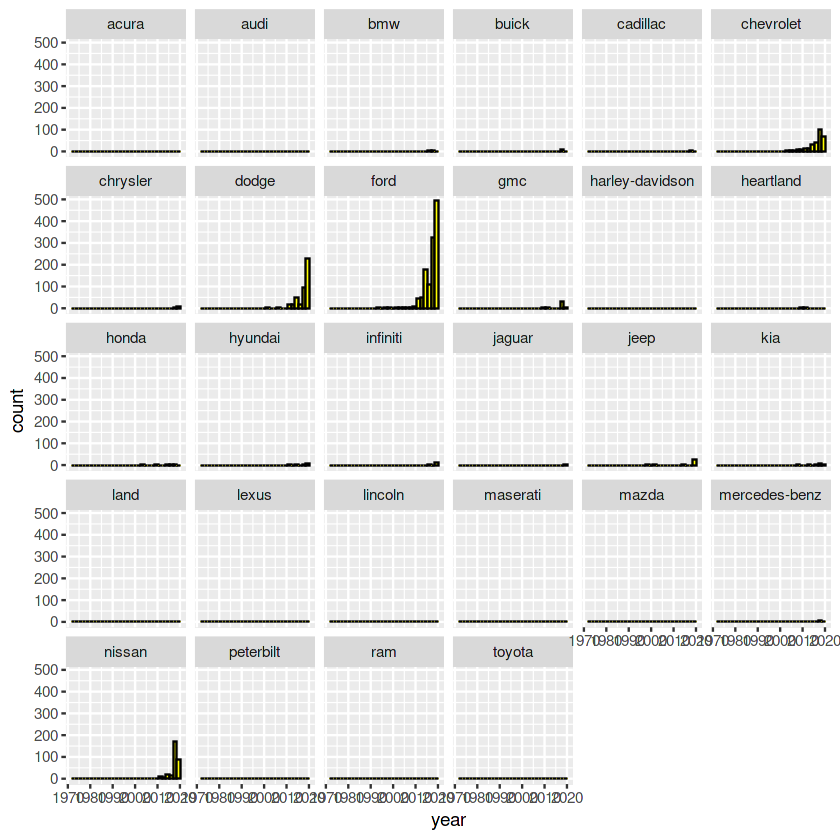

In [17]:
Data%>%
group_by(brand)%>%
ggplot(aes(x = year)) + geom_histogram(fill="yellow",colour="black")+facet_wrap(~brand)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



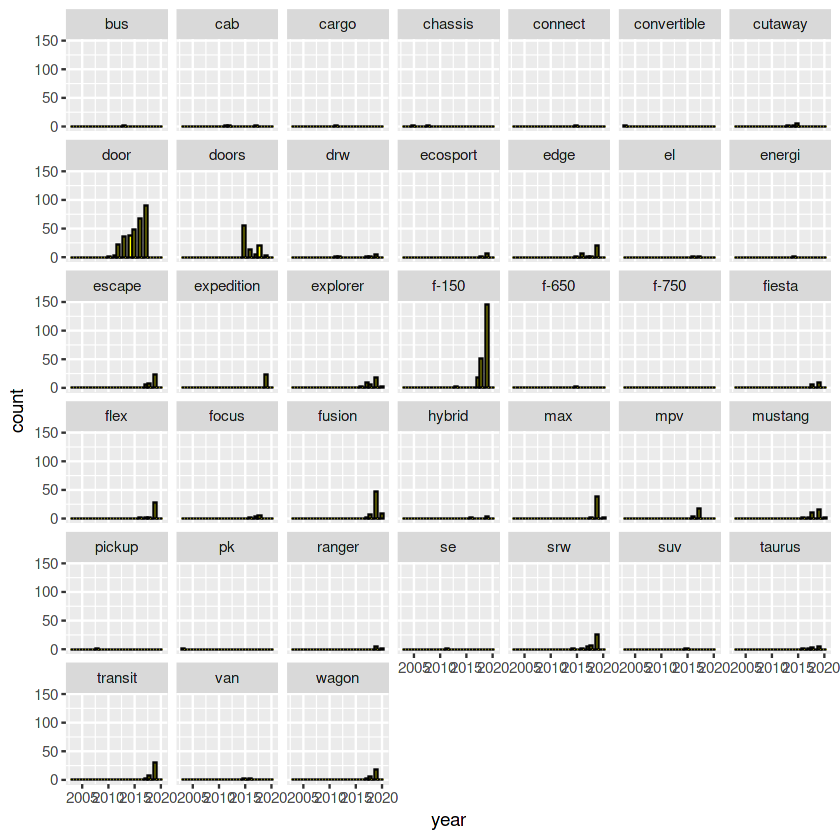

In [18]:
Ford_clean_data%>%
group_by(brand)%>%
ggplot(aes(x = year)) + geom_histogram(fill="yellow",colour="black")+facet_wrap(~model)


from the above graph we can say ford (f-150) was bought the most in 2019-20